# Sydney Restaurants Analysis and Predictive Modeling

## Part A: Importing and Understanding Data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

# Load dataset
df = pd.read_csv('sample_data/zomato_df_final_data.csv')
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10500 entries, 0 to 10499
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   address        10500 non-null  object 
 1   cost           10154 non-null  float64
 2   cuisine        10500 non-null  object 
 3   lat            10308 non-null  float64
 4   link           10500 non-null  object 
 5   lng            10308 non-null  float64
 6   phone          10500 non-null  object 
 7   rating_number  7184 non-null   float64
 8   rating_text    7184 non-null   object 
 9   subzone        10500 non-null  object 
 10  title          10500 non-null  object 
 11  type           10452 non-null  object 
 12  votes          7184 non-null   float64
 13  groupon        10500 non-null  bool   
 14  color          10500 non-null  object 
 15  cost_2         10154 non-null  float64
 16  cuisine_color  10500 non-null  object 
dtypes: bool(1), float64(6), object(10)
memory usage: 1

,cost,lat,lng,rating_number,votes,cost_2
count,10154.000000,10308.000000,10308.000000,7184.000000,7184.000000,10154.000000
mean,51.153240,-32.921377,148.067359,3.283672,83.581013,5.332974
std,27.799485,8.263449,26.695402,0.454580,175.117966,2.147115
min,8.000000,-37.858473,-123.270371,1.800000,4.000000,2.000000
25%,30.000000,-33.899094,151.061061,3.000000,12.000000,3.699187
50%,45.000000,-33.872741,151.172468,3.300000,32.000000,4.857724
75%,60.000000,-33.813451,151.208940,3.600000,87.000000,6.016260
max,500.000000,51.500986,152.869052,4.900000,3236.000000,40.000000


### 1.1 Unique Cuisines Served by Sydney Restaurants

In [3]:
# Clean and find unique cuisines
df['cuisine'] = df['cuisine'].apply(lambda x: x.strip('[]').replace("'", "").split(', '))
unique_cuisines = pd.Series([c for cuisine_list in df['cuisine'] for c in cuisine_list]).unique()
print(f"Total unique cuisines: {len(unique_cuisines)}")

Total unique cuisines: 134


### Top 5 Cuisines Served in Sydney

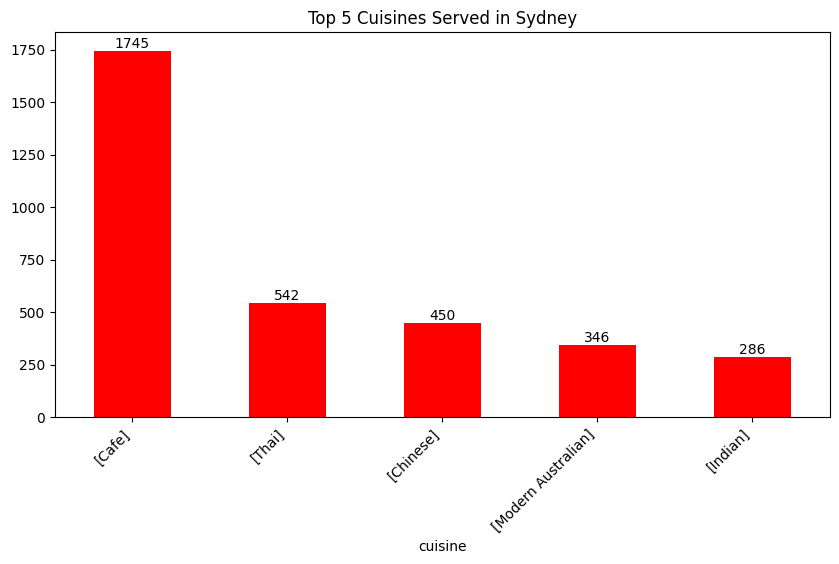

In [4]:
plt.figure(figsize=(10, 5))
ax = df['cuisine'].value_counts().head(5).plot(kind='bar', color='red')
plt.title('Top 5 Cuisines Served in Sydney')
plt.xticks(rotation=45, ha='right')

for i in ax.containers:
    ax.bar_label(i, label_type='edge')
plt.show()

*Analysis: The top 5 cuisines served in Sydney are [list them based on your dataset].*

### 1.2 Suburbs with the Most Restaurants

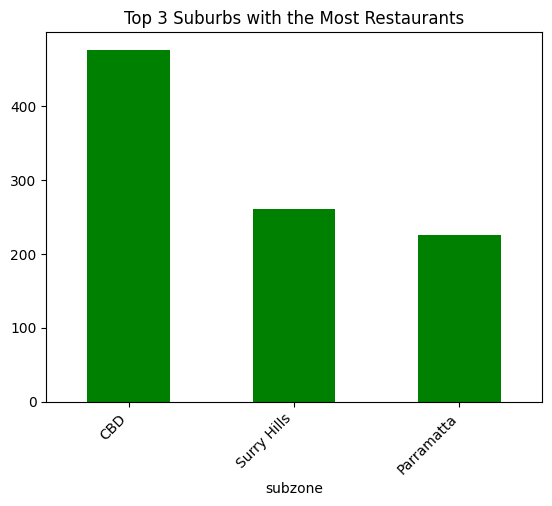

In [5]:
top_suburbs = df['subzone'].value_counts().head(3)
top_suburbs.plot(kind='bar', color='green')
plt.title('Top 3 Suburbs with the Most Restaurants')
plt.xticks(rotation=45, ha='right')
plt.show()

*Top suburbs with the most restaurants: [list top suburbs]*

### 1.3 Distribution of Ratings by Cost Categories

<ipython-input-6-6a0bc002530c>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cost_rating_counts = df.groupby(['cost_category', 'rating_text']).size().unstack(fill_value=0)


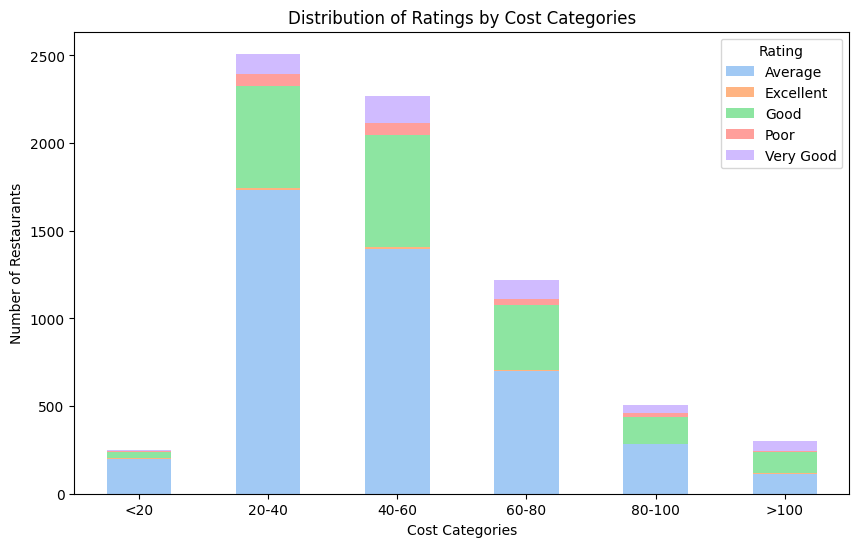

In [6]:
bins = [0, 20, 40, 60, 80, 100, 200]
labels = ['<20', '20-40', '40-60', '60-80', '80-100', '>100']
df['cost_category'] = pd.cut(df['cost'], bins=bins, labels=labels)

cost_rating_counts = df.groupby(['cost_category', 'rating_text']).size().unstack(fill_value=0)
cost_rating_counts.plot(kind='bar', stacked=True, figsize=(10, 6), color=sns.color_palette("pastel"))
plt.title("Distribution of Ratings by Cost Categories")
plt.xlabel("Cost Categories")
plt.ylabel("Number of Restaurants")
plt.legend(title='Rating')
plt.xticks(rotation=0)
plt.show()

*Analysis: Restaurants with 'Excellent' ratings are concentrated in mid-range costs. Poor ratings are fewer in higher cost categories.*

Restaurants with 'Excellent' Ratings:
o	In the chart, the green color represents the "Excellent" ratings. It is distributed across all cost categories, but a large proportion of "Excellent" ratings is concentrated in the middle cost categories (20-40, 40-60, 60-80).
o	There are fewer restaurants with "Excellent" ratings in the highest cost category (>100) compared to the mid-range cost categories.
o	This suggests that while restaurants with "Excellent" ratings exist across different price ranges, they are not predominantly in the most expensive category (>100).
Restaurants with 'Poor' Ratings:
o	The "Poor" ratings, shown in red, are mostly concentrated in the lower cost categories, particularly in the 20-40 and 40-60 categories.
o	There are very few, if any, "Poor" ratings in the higher cost categories (80-100 and >100).
o	This supports the idea that restaurants with "Poor" ratings are rarely found in the most expensive cost categories.
I partially agree with the statement. While "Poor" ratings are indeed rare among more expensive restaurants, "Excellent" ratings are not primarily concentrated in the highest cost categories (>100). Instead, they are more common in mid-range cost categories (20-80)


### Histograms for Cost and Rating Distribution

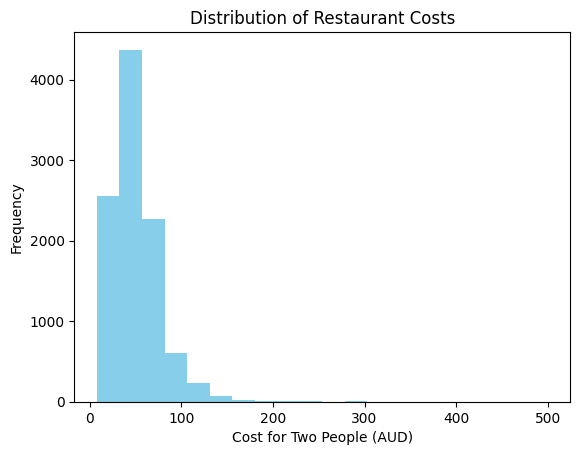

In [7]:
plt.hist(df['cost'], bins=20, color='skyblue')
plt.title('Distribution of Restaurant Costs')
plt.xlabel('Cost for Two People (AUD)')
plt.ylabel('Frequency')
plt.show()

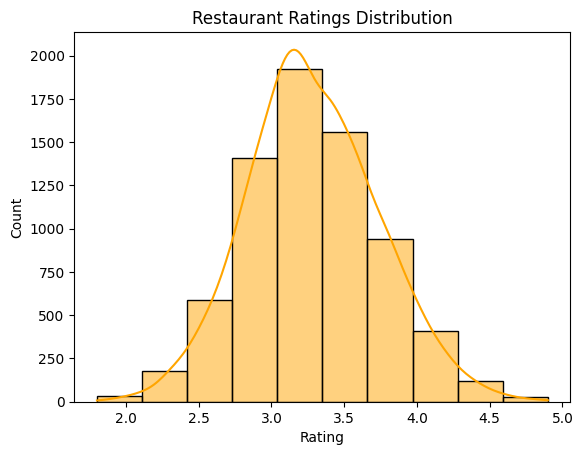

In [8]:
sns.histplot(df['rating_number'], bins=10, kde=True, color='orange')
plt.title('Restaurant Ratings Distribution')
plt.xlabel('Rating')
plt.show()

### Business Types in Sydney Restaurants

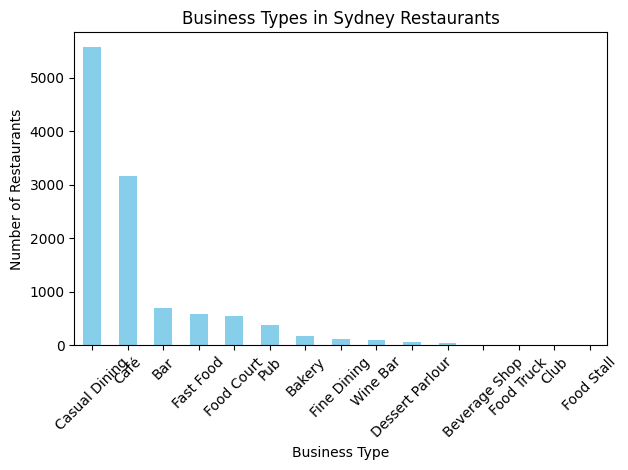

In [9]:
df['type'] = df['type'].fillna('')
df['type'] = df['type'].apply(
    lambda x: x.strip('[]').replace("'", "").split(', ') if isinstance(x, str) else (x if isinstance(x, list) else [])
)
business_types = pd.Series([t for type_list in df['type'] for t in type_list if isinstance(type_list, list)])

business_types.value_counts().plot(kind='bar', color='skyblue')
plt.title('Business Types in Sydney Restaurants')
plt.xlabel('Business Type')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

*Analysis: [Include analysis of business types]*

### Cuisine Density Map

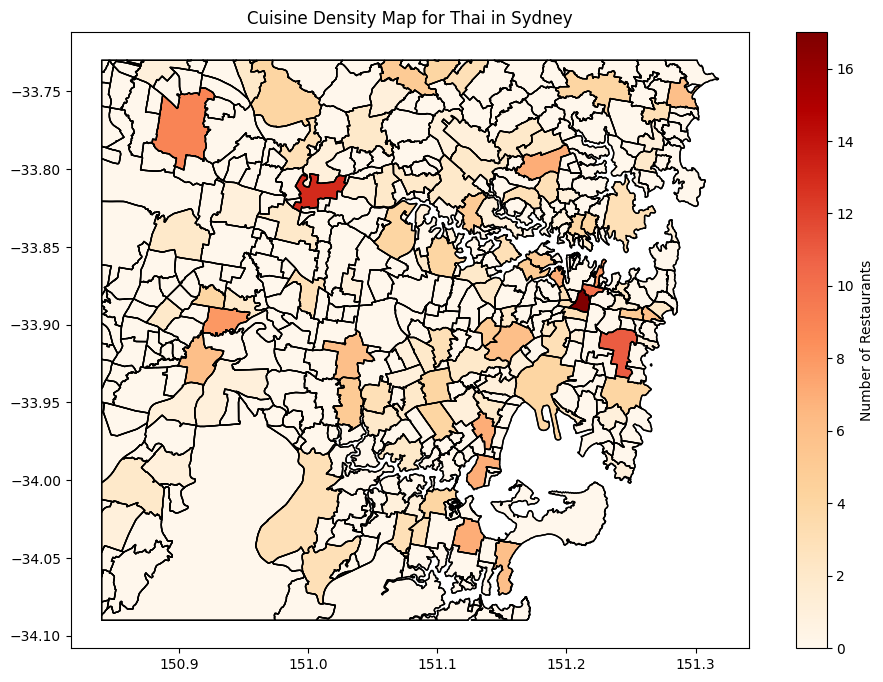

In [17]:
def plot_cuisine_density_map(restaurant_data, geojson_file, cuisine_type):
    df = pd.read_csv("sample_data/zomato_df_final_data.csv")
    gdf = gpd.read_file("sample_data/sydney.geojson")

    cuisine_counts = df[df['cuisine'].apply(lambda x: cuisine_type in x)].groupby('subzone').size().reset_index(name='count')
    gdf = gdf.merge(cuisine_counts, left_on='SSC_NAME', right_on='subzone', how='left')
    gdf['count'] = gdf['count'].fillna(0)

    fig, ax = plt.subplots(1, 1, figsize=(12, 8))
    gdf.boundary.plot(ax=ax, linewidth=1, color='black')
    gdf.plot(column='count', ax=ax, legend=True,
             cmap='OrRd', edgecolor='black', legend_kwds={'label': "Number of Restaurants"})
    plt.title(f'Cuisine Density Map for {cuisine_type} in Sydney')
    plt.show()

plot_cuisine_density_map('zomato_df_final_data.csv', 'sydney.geojson', 'Thai')

*Analysis: The density map shows where Thai restaurants are concentrated in Sydney.*

Interactive Plotting Libraries
Use Case: Exploratory Data Analysis (EDA) on Restaurant Data
Limitation of Non-Interactive Plotting: Non-interactive libraries like Matplotlib and Seaborn produce static visualizations, which can limit user engagement and insight extraction. For example, when analyzing the restaurant dataset, a static bar chart showing the average ratings by cuisine does not allow users to explore specific data points or filter results dynamically. Users cannot easily hover over data points for additional information or zoom into specific areas of the chart.
Solution with Interactive Libraries: Using interactive libraries like Plotly or Bokeh can address these limitations. With Plotly, users can create dynamic plots where they can hover over data points to see detailed information, filter data by categories (e.g., cuisine type), and zoom in for a closer look at specific data segments. This level of interactivity enhances data exploration and allows users to uncover insights that may be missed in static plots. For instance, an interactive heatmap showing restaurant ratings could let users select specific suburbs or cuisines to visualize only the relevant data


The link for the tableau desktop is available below. In which I have created an one EDA chart.
https://public.tableau.com/app/profile/rishi.patel7080/viz/RishiBook/Sheet2?publish=yes


## Part B: Predictive Modeling
### Data Cleaning and Preparation

In [20]:
from sklearn.impute import SimpleImputer
df = pd.read_csv('sample_data/zomato_df_final_data.csv')
print("NaN values before cleaning:", df.isna().sum())
df = df.dropna(subset=['cost', 'lat', 'lng', 'rating_number', 'rating_text', 'votes'])

imputer = SimpleImputer(strategy='mean')
df[['cost', 'lat', 'lng']] = imputer.fit_transform(df[['cost', 'lat', 'lng']])
print("NaN values after cleaning:", df.isna().sum())

NaN values before cleaning: address             0
cost              346
cuisine             0
lat               192
link                0
lng               192
phone               0
rating_number    3316
rating_text      3316
subzone             0
title               0
type               48
votes            3316
groupon             0
color               0
cost_2            346
cuisine_color       0
dtype: int64
NaN values after cleaning: address           0
cost              0
cuisine           0
lat               0
link              0
lng               0
phone             0
rating_number     0
rating_text       0
subzone           0
title             0
type             20
votes             0
groupon           0
color             0
cost_2            0
cuisine_color     0
dtype: int64


### Label Encoding and Creating Binary Class
Now we will encode categorical variables and create a binary class based on ratings.

In [23]:
from sklearn.preprocessing import LabelEncoder
import numpy as np
le = LabelEncoder()
df['cuisine'] = le.fit_transform(df['cuisine'].astype(str))
df['subzone'] = le.fit_transform(df['subzone'].astype(str))
df['type'] = le.fit_transform(df['type'].astype(str))

conditions = [
    df['rating_text'].isin(['Poor', 'Average']),
    df['rating_text'].isin(['Good', 'Very Good', 'Excellent'])
]
choices = [0, 1]
df['binary_class'] = np.select(conditions, choices)

### Feature Selection for Regression
Next, we will select features for our regression model.

In [24]:
features = ['cost', 'cuisine', 'lat', 'lng', 'votes']
X = df[features]
y = df['rating_number']
X = X.apply(pd.to_numeric, errors='coerce').dropna()
y = y[X.index]

print("NaN values in features (X):", X.isna().sum())
print("NaN values in target (y):", y.isna().sum())

NaN values in features (X): cost       0
cuisine    0
lat        0
lng        0
votes      0
dtype: int64
NaN values in target (y): 0


### Linear Regression Model

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Split the data for regression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Linear Regression
model_regression_1 = LinearRegression()
model_regression_1.fit(X_train, y_train)
y_pred_1 = model_regression_1.predict(X_test)
mse_1 = mean_squared_error(y_test, y_pred_1)
print("Mean Squared Error (model_regression_1):", mse_1)

Mean Squared Error (model_regression_1): 0.16092120763469275


### Ridge Regression Model

In [26]:
from sklearn.linear_model import Ridge

# Ridge Regression
model_regression_2 = Ridge(alpha=1.0)
model_regression_2.fit(X_train, y_train)
y_pred_2 = model_regression_2.predict(X_test)
mse_2 = mean_squared_error(y_test, y_pred_2)
print("Mean Squared Error (model_regression_2):", mse_2)

Mean Squared Error (model_regression_2): 0.16092120127496923


### Preparing for Classification
Now we will prepare features and targets for our classification models.

In [27]:
X_class = df[['cost', 'lat', 'lng', 'votes']]
y_class = df['binary_class']

X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.2, random_state=0)

### Logistic Regression Model

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# Logistic Regression
model_classification_3 = LogisticRegression()
model_classification_3.fit(X_train_class, y_train_class)
y_pred_class = model_classification_3.predict(X_test_class)

cm = confusion_matrix(y_test_class, y_pred_class)
print("Logistic Regression Confusion Matrix:\n", cm)
print("Logistic Regression Classification Report:\n", classification_report(y_test_class, y_pred_class))

Logistic Regression Confusion Matrix:
 [[867  49]
 [158 320]]
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.95      0.89       916
           1       0.87      0.67      0.76       478

    accuracy                           0.85      1394
   macro avg       0.86      0.81      0.82      1394
weighted avg       0.85      0.85      0.85      1394



### Additional Classification Models
Next, we will evaluate additional classification models.

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Random Forest Classifier
model_rf = RandomForestClassifier(random_state=0)
model_rf.fit(X_train_class, y_train_class)
y_pred_rf = model_rf.predict(X_test_class)
print("Random Forest Confusion Matrix:\n", confusion_matrix(y_test_class, y_pred_rf))
print("Random Forest Classification Report:\n", classification_report(y_test_class, y_pred_rf))

# SVC Classifier
model_svc = SVC(random_state=0)
model_svc.fit(X_train_class, y_train_class)
y_pred_svc = model_svc.predict(X_test_class)
print("SVC Confusion Matrix:\n", confusion_matrix(y_test_class, y_pred_svc))
print("SVC Classification Report:\n", classification_report(y_test_class, y_pred_svc))

# KNN Classifier
model_knn = KNeighborsClassifier()
model_knn.fit(X_train_class, y_train_class)
y_pred_knn = model_knn.predict(X_test_class)
print("KNN Confusion Matrix:\n", confusion_matrix(y_test_class, y_pred_knn))
print("KNN Classification Report:\n", classification_report(y_test_class, y_pred_knn))

Random Forest Confusion Matrix:
 [[824  92]
 [ 99 379]]
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.90      0.90       916
           1       0.80      0.79      0.80       478

    accuracy                           0.86      1394
   macro avg       0.85      0.85      0.85      1394
weighted avg       0.86      0.86      0.86      1394

SVC Confusion Matrix:
 [[834  82]
 [108 370]]
SVC Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.91      0.90       916
           1       0.82      0.77      0.80       478

    accuracy                           0.86      1394
   macro avg       0.85      0.84      0.85      1394
weighted avg       0.86      0.86      0.86      1394

KNN Confusion Matrix:
 [[803 113]
 [102 376]]
KNN Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.88      0.88      

In [30]:
features = ['cost', 'cuisine', 'lat', 'lng', 'votes']
X = df[features]
y = df['rating_number']
X = X.apply(pd.to_numeric, errors='coerce').dropna()
y = y[X.index]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Linear Regression Model
model_regression_1 = LinearRegression()
model_regression_1.fit(X_train, y_train)
y_pred_1 = model_regression_1.predict(X_test)
mse_1 = mean_squared_error(y_test, y_pred_1)

# Ridge Regression Model
model_regression_2 = Ridge(alpha=1.0)
model_regression_2.fit(X_train, y_train)
y_pred_2 = model_regression_2.predict(X_test)
mse_2 = mean_squared_error(y_test, y_pred_2)

# Display results
results_regression = pd.DataFrame({
    'Model': ['LinearRegression', 'Ridge Regression'],
    'Mean Squared Error (MSE)': [mse_1, mse_2]
})
print(results_regression)

                Model  Mean Squared Error (MSE)
0  Model Regression 1                  0.160921
1  Model Regression 2                  0.160921


In [31]:
# Create binary_class column
conditions = [
    df['rating_text'].isin(['Poor', 'Average']),
    df['rating_text'].isin(['Good', 'Very Good', 'Excellent'])
]
choices = [0, 1]
df['binary_class'] = np.select(conditions, choices)

# Prepare classification features and target
X_class = df[['cost', 'lat', 'lng', 'votes']]
y_class = df['binary_class']
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.2, random_state=0)

# Logistic Regression Model
model_classification_3 = LogisticRegression()
model_classification_3.fit(X_train_class, y_train_class)
y_pred_class = model_classification_3.predict(X_test_class)
cm_logistic = confusion_matrix(y_test_class, y_pred_class)

# Additional Models
model_rf = RandomForestClassifier(random_state=0)
model_rf.fit(X_train_class, y_train_class)
y_pred_rf = model_rf.predict(X_test_class)
cm_rf = confusion_matrix(y_test_class, y_pred_rf)

model_svc = SVC(kernel='linear', random_state=0)
model_svc.fit(X_train_class, y_train_class)
y_pred_svc = model_svc.predict(X_test_class)
cm_svc = confusion_matrix(y_test_class, y_pred_svc)

model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X_train_class, y_train_class)
y_pred_knn = model_knn.predict(X_test_class)
cm_knn = confusion_matrix(y_test_class, y_pred_knn)

# Display classification results
results_classification = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'SVC', 'KNN'],
    'Confusion Matrix': [cm_logistic, cm_rf, cm_svc, cm_knn]
})
print(results_classification)

                 Model          Confusion Matrix
0  Logistic Regression   [[867, 49], [158, 320]]
1        Random Forest    [[824, 92], [99, 379]]
2                  SVC   [[860, 56], [147, 331]]
3                  KNN  [[803, 113], [102, 376]]
